In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas
import csv

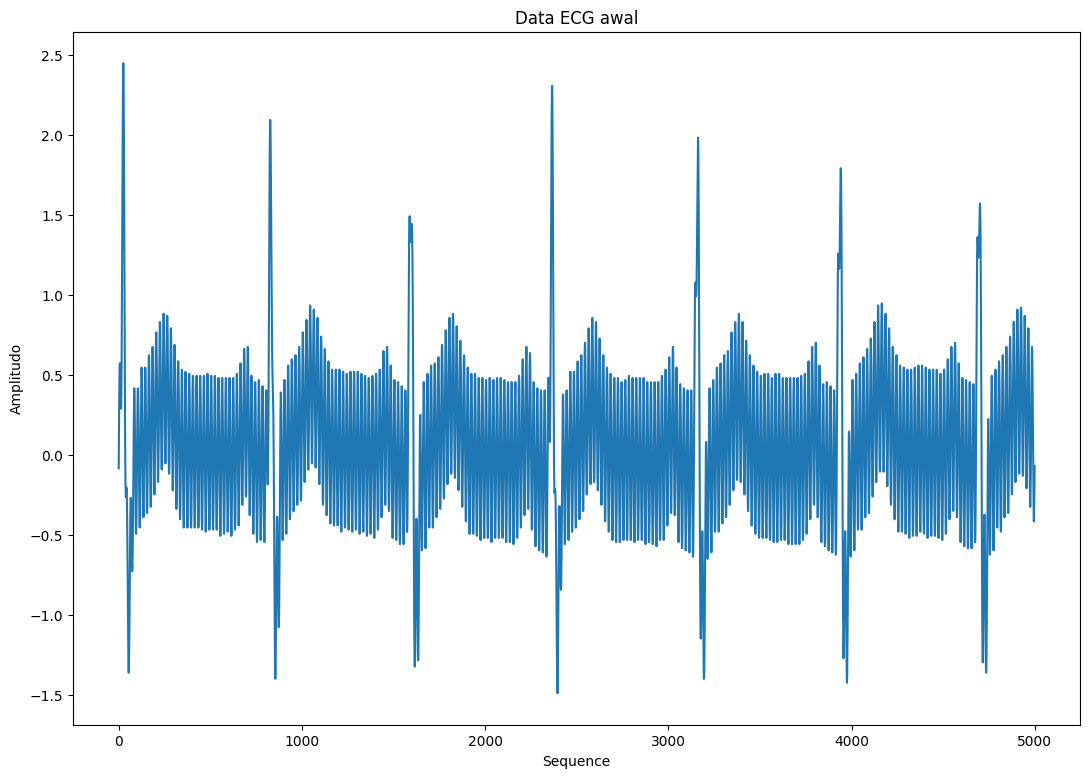

In [4]:
# Membaca data dari file teks
time = []
amplitudo = []

with open('data ECG.txt') as file:
    lines = csv.reader(file, delimiter='\t')
    for row in lines:
        values = row[0].split()
        if len(values) == 2:
            time_value = float(values[0])
            amplitudo_value = float(values[1])
            time.append(time_value)
            amplitudo.append(amplitudo_value-1.25)

plt.figure(figsize=((13,9)))
plt.plot(time, amplitudo)
plt.title('Data ECG awal')
plt.xlabel('Sequence')
plt.ylabel('Amplitudo')
plt.show()

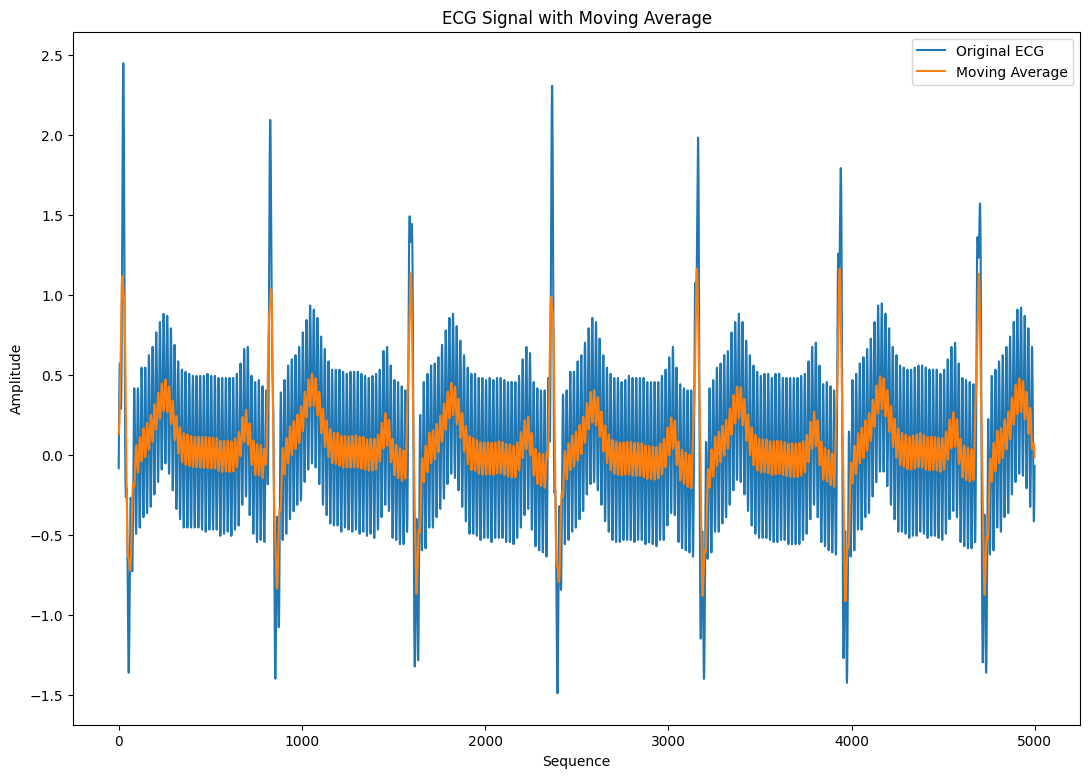

In [5]:
sum = 0
window =  30
mAver = []

# Assuming amplitudo is defined somewhere before this code
amplitudo1 = amplitudo

k = int((window - 1) / 2)
newarraystart = np.full(k, amplitudo1[0])
newarraysend = np.full(k, amplitudo1[-1])

arr = np.concatenate([newarraystart, amplitudo1, newarraysend])

for i in range(k, len(amplitudo1) + k ):
    for ii in range(i - k, i + k):
        sum = sum + arr[ii]
    mAver.append(sum / window)
    sum = 0

# Plot the data
plt.figure(figsize=(13, 9))
plt.plot(time, amplitudo, label='Original ECG')
plt.plot(time, mAver, label='Moving Average')
plt.title('ECG Signal with Moving Average')
plt.xlabel('Sequence')
plt.ylabel('Amplitude')
plt.legend()
plt.show()# Zoom in on a specific portion of the graph
# Set the x-axis limits (start_time and end_time are placeholders)
#plt.ylim(lower_amplitude_limit, upper_amplitude_limit)  # Set the y-axis limits (lower_amplitude_limit and upper_amplitude_limit are placeholders)


amplitudo = mAver

In [6]:
'''
sum = 0
window=30
mAver = []
k = int((window-1)/2)
for i in np.arange(k, len(amplitudo)-k):
    for ii in np.arange(i-k, i+k):
        sum = sum + amplitudo[ii]
    mAver.append(sum / window)
    sum = 0
zeros = [0]*k
mAver = zeros + mAver + zeros

plt.figure(figsize=((13,9)))
plt.plot(amplitudo)
plt.plot(mAver)
plt.xlabel("Sequence (n)")
plt.ylabel("Amplitude (mV)")
plt.title("MAV Awal")
plt.show()
'''

'\nsum = 0\nwindow=30\nmAver = []\nk = int((window-1)/2)\nfor i in np.arange(k, len(amplitudo)-k):\n    for ii in np.arange(i-k, i+k):\n        sum = sum + amplitudo[ii]\n    mAver.append(sum / window)\n    sum = 0\nzeros = [0]*k\nmAver = zeros + mAver + zeros\n\nplt.figure(figsize=((13,9)))\nplt.plot(amplitudo)\nplt.plot(mAver)\nplt.xlabel("Sequence (n)")\nplt.ylabel("Amplitude (mV)")\nplt.title("MAV Awal")\nplt.show()\n'

In [7]:
#sinyal p
sp=np.zeros(N)
Nt=len(sp)
for i in range (N):
    if i>=1350 and i<=1500:
        sp[i]=mAver[i]
    else:
        sp[i]=0
i= np.arange(0,Nt,dtype=int)

plt.figure(figsize=((13,9)))
plt.plot(sp)
plt.xlim(1000,2000)

NameError: name 'N' is not defined

In [8]:
#sinyal qrs
sqrs=np.zeros(N)
Nqrs=len(sqrs)
for i in range (N):
    if i>=1580 and i<=1650:
        sqrs[i]=mAver[i]
    else:
        sqrs[i]=0
i= np.arange(0,Nt,dtype=int)

plt.figure(figsize=((13,9)))
plt.plot(sqrs)
plt.xlim(1000,2000)

NameError: name 'N' is not defined

(2000.0, 3000.0)

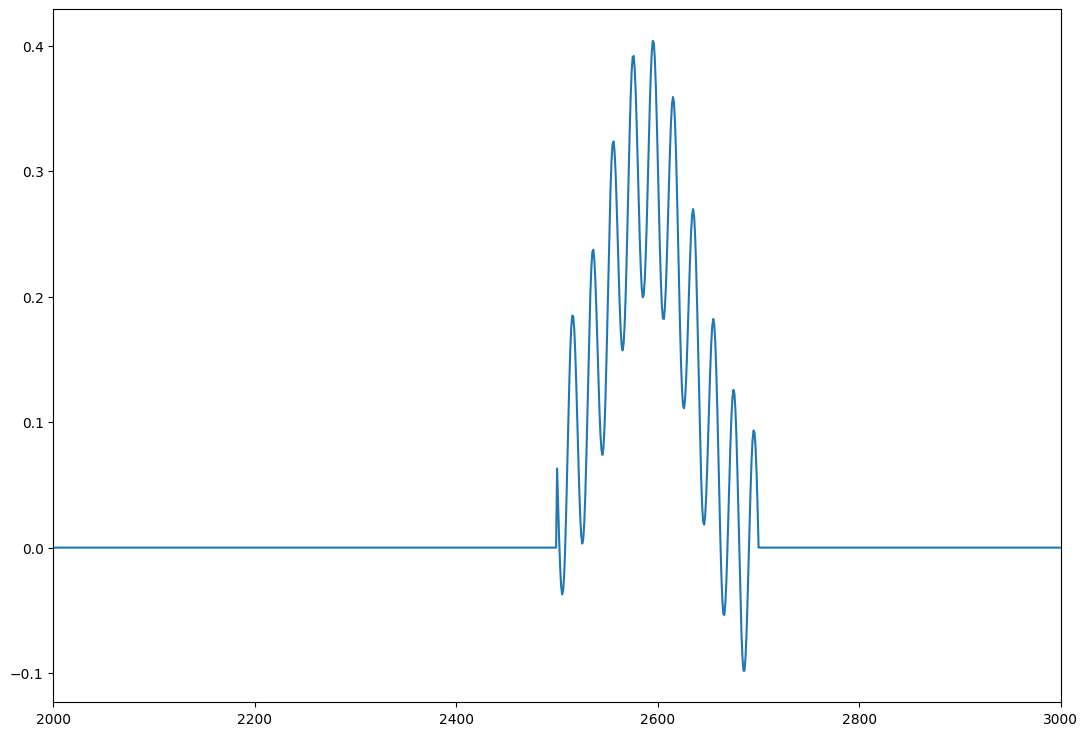

In [ ]:
#sinyal t
st=np.zeros(N)
Nt=len(st)
for i in range (N):
    if i>=2500 and i<=2700:
        st[i]=mAver[i]
    else:
        st[i]=0

i= np.arange(0,Nt,dtype=int)

plt.figure(figsize=((13,9)))
plt.plot(st)
plt.xlim(2000,3000)

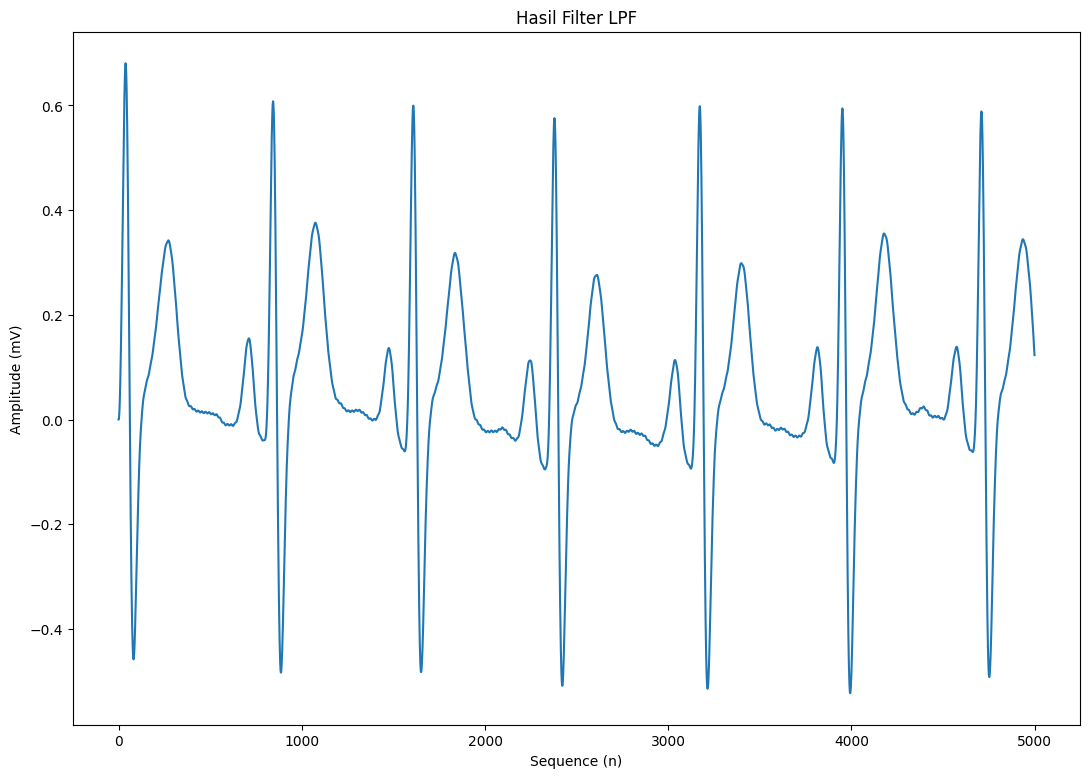

In [ ]:
cutoff_frequency = 14
sampling_period = 1/fs
orde=2

y = np.zeros(len(mAver))  # Initialize the output signal
omega_c = 2 * np.pi * cutoff_frequency
omega_c_squared = omega_c*omega_c
sampling_period_squared = sampling_period*sampling_period
if orde == 1:
    for n in range(len(mAver)):
        if n == 0:
            y[n] = (omega_c * mAver[n]) / ((2 / sampling_period) + omega_c)
        else:
            y[n] = (((2 / sampling_period) - omega_c) * y[n-1] + omega_c * mAver[n] + omega_c * mAver[n-1]) / ((2 / sampling_period) + omega_c)
elif orde == 2:
    for n in range(2, len(mAver)):
        y[n] = (((8/sampling_period_squared)-2*omega_c_squared) * y[n-1]
            - ((4/sampling_period_squared) - (2 * np.sqrt(2) * omega_c / sampling_period) + omega_c_squared) * y[n-2]
            + omega_c_squared * mAver[n]
            + 2 * omega_c_squared * mAver[n-1]
            + omega_c_squared * mAver[n-2]) / ((4/sampling_period_squared) + (2 * np.sqrt(2) * omega_c / sampling_period) + omega_c_squared)
        
filtered_lowpassMAV = y
plt.figure(figsize=((13,9)))
plt.plot(filtered_lowpassMAV)
plt.xlabel("Sequence (n)")
plt.ylabel("Amplitude (mV)")
plt.title("Hasil Filter LPF")
plt.show()

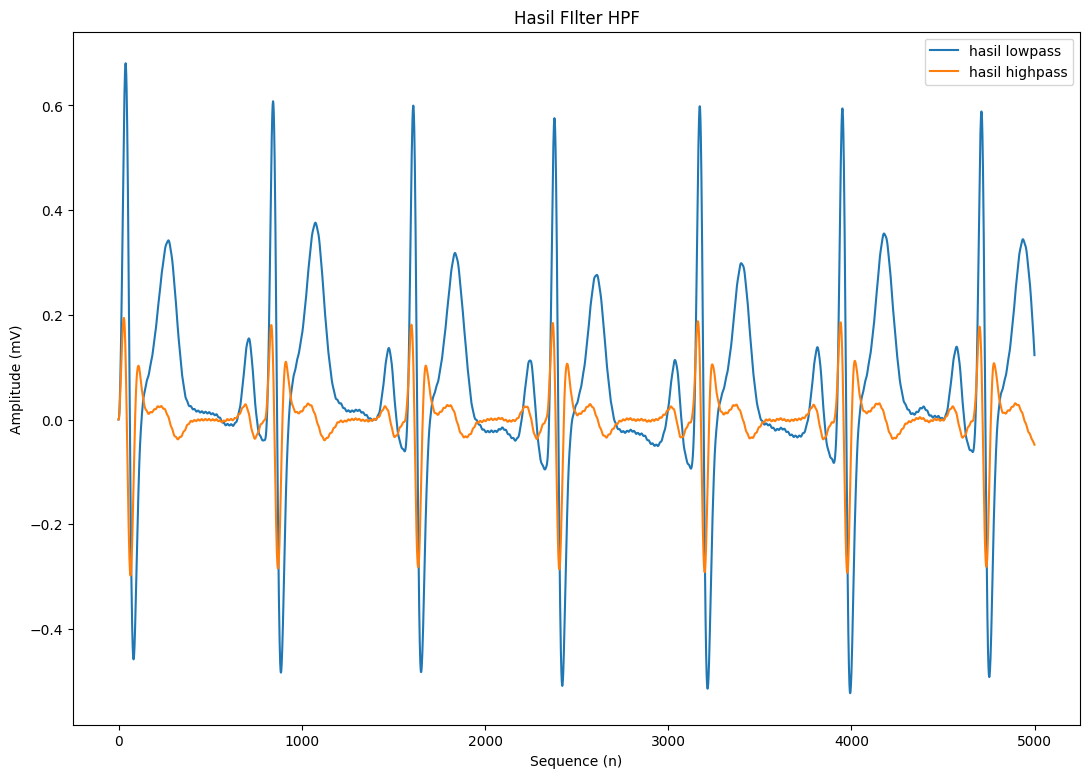

In [ ]:
cutoff_frequency = 14
sampling_period = 1/fs
orde=2

y = np.zeros(len(filtered_lowpassMAV))
omega_c = 2 * np.pi * cutoff_frequency
omega_c_squared = omega_c*omega_c
sampling_period_squared = sampling_period*sampling_period
if orde == 1:
    for n in range(len(filtered_lowpassMAV)):
        if n == 0:
            y[n] = (omega_c * filtered_lowpassMAV[n]) / ((2 / sampling_period) + omega_c)
        else:
            y[n] = (((2 / sampling_period) - omega_c) * y[n-1] + (2 / sampling_period) * filtered_lowpassMAV[n] + (2 / sampling_period) * filtered_lowpassMAV[n-1]) / ((2 / sampling_period) + omega_c)
elif orde == 2:
    for n in range(2, (len(filtered_lowpassMAV))):
        y[n] = ((4/sampling_period_squared)*filtered_lowpassMAV[n] - (8/sampling_period_squared)*filtered_lowpassMAV[n-1] + (4/sampling_period_squared)*filtered_lowpassMAV[n-2] - (2*omega_c-(8/sampling_period_squared))*y[n-1] - (omega_c-(2*np.sqrt(2)*omega_c/sampling_period)+(4/sampling_period_squared))*y[n-2])/(omega_c + 2*np.sqrt(2)*omega_c/sampling_period + (4/sampling_period_squared))    

filtered_highpassMAV=y
plt.figure(figsize=((13,9)))
plt.plot(filtered_lowpassMAV,label='hasil lowpass')
plt.plot(filtered_highpassMAV,label='hasil highpass')
plt.legend()
plt.xlabel("Sequence (n)")
plt.ylabel("Amplitude (mV)")
plt.title("Hasil FIlter HPF")
plt.show()

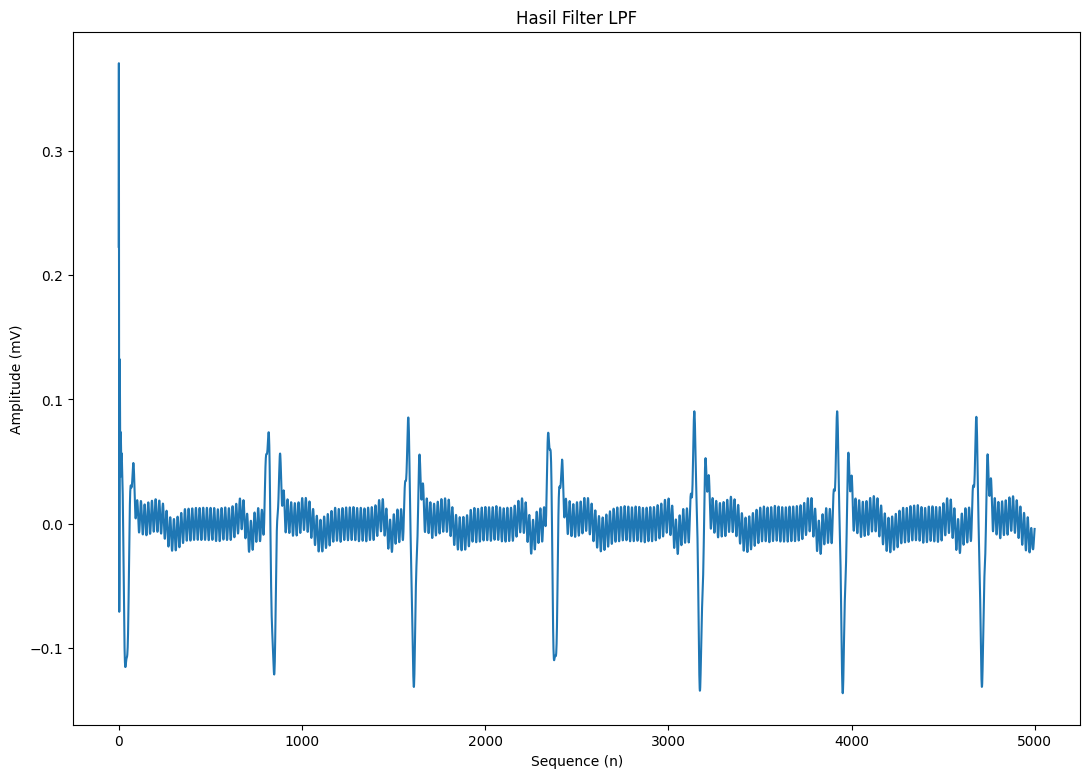

In [ ]:
#Demo
fs=1000
cutoff_frequency = 14
sampling_period = 1/fs

r=0.27
theta=2*np.pi*cutoff_frequency/fs
y = np.zeros(len(amplitudo))  # Initialize the output signal
omega_c = 2 * np.pi * cutoff_frequency
omega_c_squared = omega_c*omega_c
sampling_period_squared = sampling_period*sampling_period


for n in range(len(amplitudo)):
    y[n] = amplitudo[n]-amplitudo[n-2]+2*np.cos(theta)*r*y[n-1]-r*2*y[n-2]
    
        
filtered = y
plt.figure(figsize=((13,9)))
plt.plot(filtered)
plt.xlabel("Sequence (n)")
plt.ylabel("Amplitude (mV)")
plt.title("Hasil Filter LPF")
plt.show()


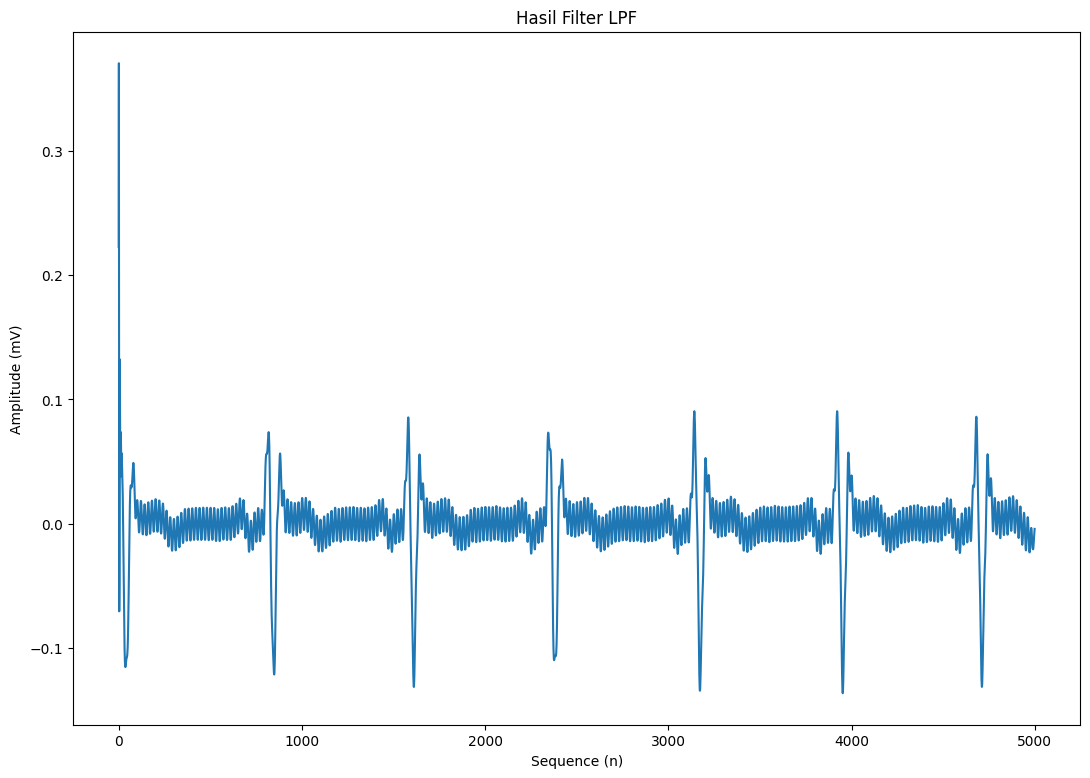

In [ ]:
#Demo
cutoff_frequency = 10
sampling_period = 1/fs

r=0.27
theta=2*np.pi*cutoff_frequency/fs
y = np.zeros(len(amplitudo))  # Initialize the output signal
omega_c = 2 * np.pi * cutoff_frequency
omega_c_squared = omega_c*omega_c
sampling_period_squared = sampling_period*sampling_period


for n in range(len(mAver)):
    y[n] = amplitudo[n]-amplitudo[n-2]+2*np.cos(theta)*r*y[n-1]-r*2*y[n-2]
    
        
filtered_baru = y
plt.figure(figsize=((13,9)))
plt.plot(filtered_baru)
plt.xlabel("Sequence (n)")
plt.ylabel("Amplitude (mV)")
plt.title("Hasil Filter LPF")
plt.show()

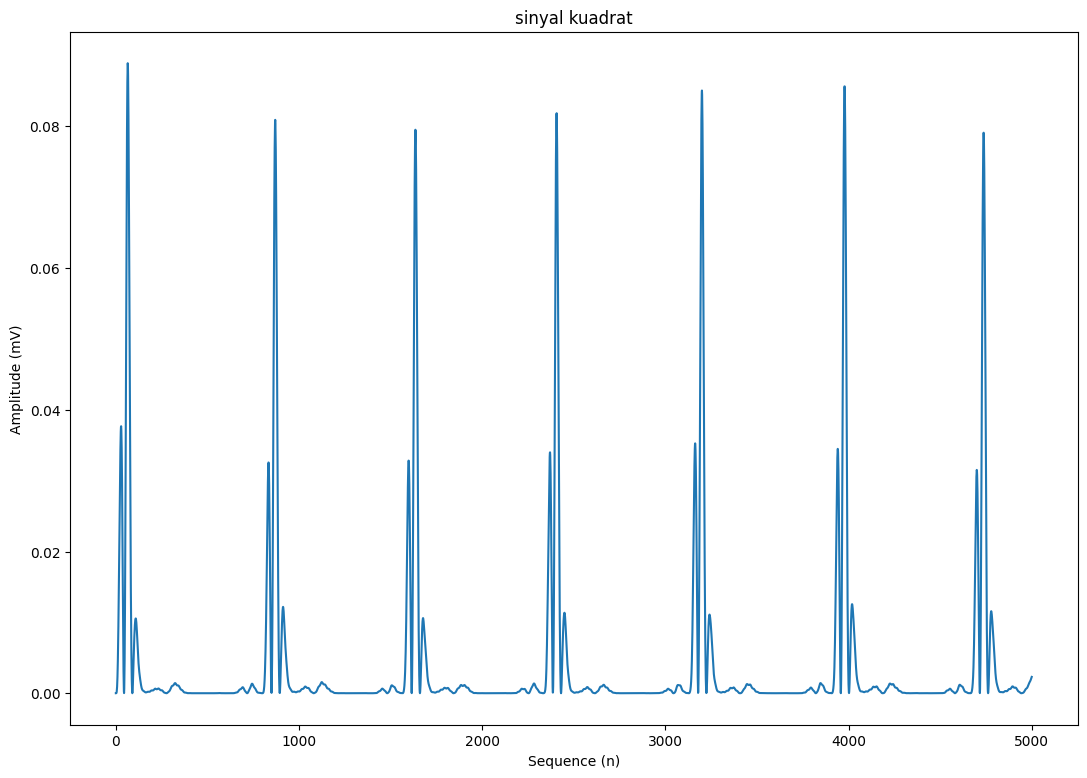

In [ ]:
sinyal_kuadrat=[]

for i in range (len(mAver)):
    sinyal_kuadrat.append(filtered_highpassMAV[i]*filtered_highpassMAV[i])

plt.figure(figsize=((13,9)))
plt.plot(sinyal_kuadrat,label='sinyal kuadrat')
plt.xlabel("Sequence (n)")
plt.ylabel("Amplitude (mV)")
plt.title("sinyal kuadrat")
plt.show()

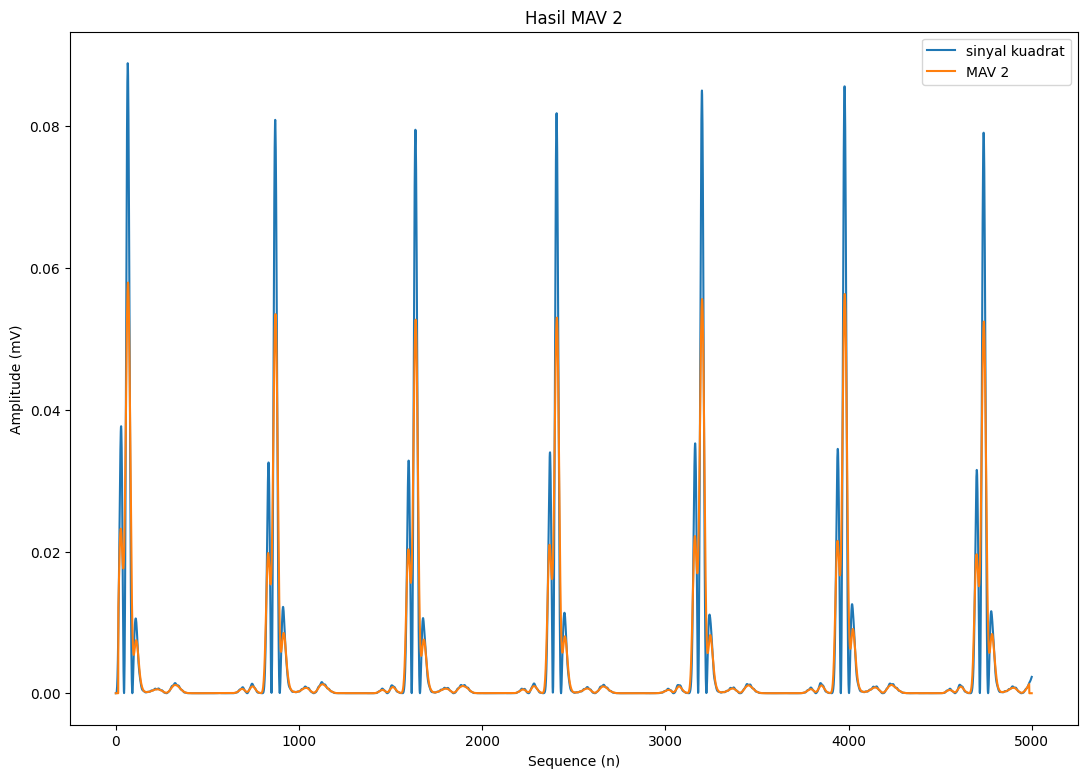

In [ ]:
sum = 0
window=30
mAver = []
k = int((window-1)/2)

for i in np.arange(k, len(sinyal_kuadrat)-k):
    for ii in np.arange(i-k, i+k):
        sum = sum + sinyal_kuadrat[ii]
    mAver.append(sum / window)
    sum = 0
zeros = [0]*k
mAver2 = zeros + mAver + zeros

plt.figure(figsize=((13,9)))
plt.plot(sinyal_kuadrat,label='sinyal kuadrat')
plt.plot(mAver2,label='MAV 2')
plt.legend()
plt.xlabel("Sequence (n)")
plt.ylabel("Amplitude (mV)")
plt.title("Hasil MAV 2")
plt.show()

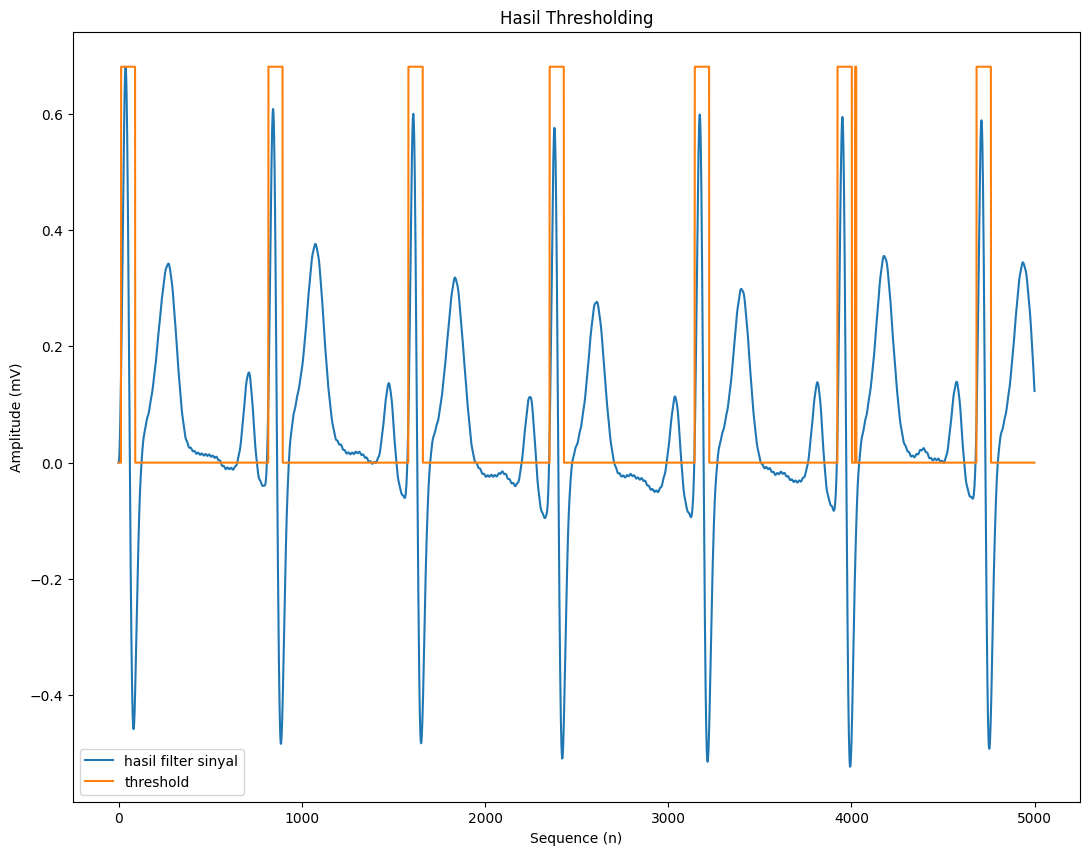

In [ ]:
sinyal_threshold = []
for i in range (N):
    if mAver2[i]>0.15 * np.max(mAver2):
        sinyal_threshold.append(np.max(filtered_lowpassMAV))
    else:
        sinyal_threshold.append(0)

plt.figure(figsize=((13,10)))
plt.plot(filtered_lowpassMAV,label='hasil filter sinyal')
plt.plot(sinyal_threshold,label='threshold')
plt.legend()
plt.xlabel("Sequence (n)")
plt.ylabel("Amplitude (mV)")
plt.title("Hasil Thresholding")
plt.show()

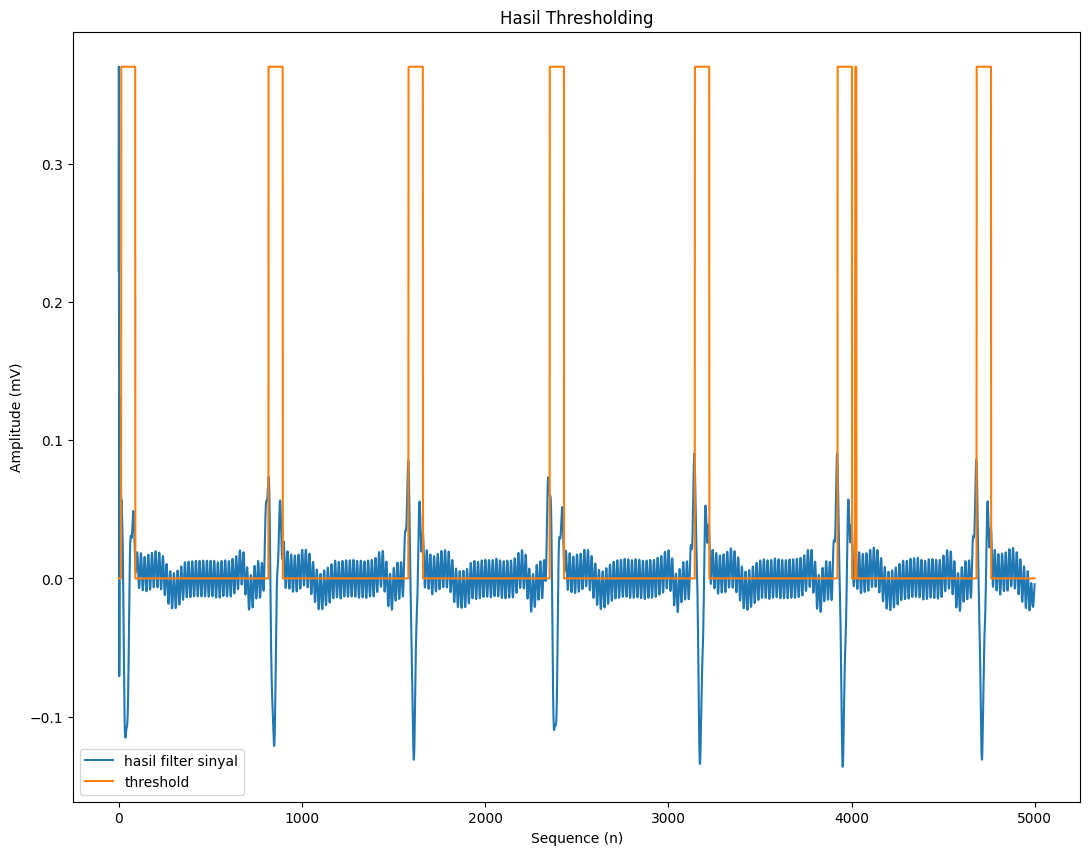

In [ ]:
sinyal_threshold = []
for i in range (N):
    if mAver2[i]>0.15 * np.max(mAver2):
        sinyal_threshold.append(np.max(filtered))
    else:
        sinyal_threshold.append(0)

plt.figure(figsize=((13,10)))
plt.plot(filtered,label='hasil filter sinyal')
plt.plot(sinyal_threshold,label='threshold')
plt.legend()
plt.xlabel("Sequence (n)")
plt.ylabel("Amplitude (mV)")
plt.title("Hasil Thresholding")
plt.show()

In [ ]:
Ndata = len(filtered_highpassMAV)
peaktop = 0
NilaiFlag = []  
for n in range(1, Ndata):
    if sinyal_threshold[n] > sinyal_threshold[n - 1]:
        NilaiFlag.append(n/fs)
        peaktop += 1
# Initialize RRinterval and heartrate
RRinterval = np.zeros(peaktop)
heartrate = np.zeros(peaktop)

temp = 0
for n in range(1, peaktop):
    RRinterval[n] = NilaiFlag[n] - NilaiFlag[n - 1]
    heartrate[n] = 60 / RRinterval[n]
    temp += heartrate[n]
    print("Heart Rate:", heartrate[n])
    print("RR Interval:",RRinterval[n]) 

meanHR = temp / (peaktop - 1)
print("HR Mean:", meanHR)

Heart Rate: 74.6268656716418
RR Interval: 0.8039999999999999
Heart Rate: 78.53403141361255
RR Interval: 0.7640000000000001
Heart Rate: 77.82101167315174
RR Interval: 0.7710000000000001
Heart Rate: 75.75757575757578
RR Interval: 0.7919999999999998
Heart Rate: 77.02182284980745
RR Interval: 0.7789999999999999
Heart Rate: 625.0000000000024
RR Interval: 0.09599999999999964
Heart Rate: 90.49773755656105
RR Interval: 0.6630000000000003
HR Mean: 157.03700641747898


In [ ]:
Ndata = len(filtered)
peaktop = 0
NilaiFlag = []  
for n in range(1, Ndata):
    if sinyal_threshold[n] > sinyal_threshold[n - 1]:
        NilaiFlag.append(n/fs)
        peaktop += 1
# Initialize RRinterval and heartrate
RRinterval = np.zeros(peaktop)
heartrate = np.zeros(peaktop)

temp = 0
for n in range(1, peaktop):
    RRinterval[n] = NilaiFlag[n] - NilaiFlag[n - 1]
    heartrate[n] = 60 / RRinterval[n]
    temp += heartrate[n]
    print("Heart Rate:", heartrate[n])
    print("RR Interval:",RRinterval[n]) 

meanHR = temp / (peaktop - 1)
print("HR Mean:", meanHR)

Heart Rate: 74.6268656716418
RR Interval: 0.8039999999999999
Heart Rate: 78.53403141361255
RR Interval: 0.7640000000000001
Heart Rate: 77.82101167315174
RR Interval: 0.7710000000000001
Heart Rate: 75.75757575757578
RR Interval: 0.7919999999999998
Heart Rate: 77.02182284980745
RR Interval: 0.7789999999999999
Heart Rate: 625.0000000000024
RR Interval: 0.09599999999999964
Heart Rate: 90.49773755656105
RR Interval: 0.6630000000000003
HR Mean: 157.03700641747898
